### Pair VI 
# Estandarización

In [1]:
# Tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Gestión de los warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Transformación de los datos
from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [2]:
df = pd.read_pickle("../data/5_normalizacion.pkl")
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,...,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_box
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,...,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,14.116848
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,...,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,18.045386


In [3]:
df.reset_index(inplace=True, drop= True)

In [4]:
df.duplicated().sum()

0

A pesar de que nuestros datos no son normales y ya están estandarizados, en la misma moneda, vamos a realizar el método, Método Sklearn RobustScaler, para poder practicar el ejercicio de este tema. Elegimos este método porque se usa cuando no ha habido gestión de outliers, ya que los hemos respetado porque tenían sentido. Solamente hemos gestionado el máximo valor de aquellos outliers que creemos que correspondían con un dato erroneo.

```Método Sklearn RobustScaler```

In [5]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_box
0,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.770,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,14.116848
1,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.950,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,18.045386
2,483.19,2.548571,6.5800,1.650,9.430000,54.5075,21.285,3.18,2.22,132.74,2.662,0.79,26734.235,30.45,0.11,80.12,613.7650,1981.745,9.15,13.330144
3,419.02,2.475000,3.0475,1.498,11.493333,49.1750,26.970,5.48,2.65,254.89,3.092,1.38,20592.315,38.02,0.15,97.45,820.1275,3066.240,7.80,12.772205
4,2672.23,7.647857,5.1825,2.728,21.986667,70.2475,36.415,9.42,3.39,384.01,11.052,1.41,27749.865,22.06,0.16,176.24,1424.5550,16340.420,3.47,21.616578


In [6]:
numericas.drop(columns = ["salario"], axis = 1, inplace = True)


In [7]:
numericas.head(2)

,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_box
0,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,14.116848
1,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,18.045386


In [8]:
numericas.duplicated().sum()

92

In [9]:
robust = RobustScaler()

In [10]:
robust.fit(numericas)

RobustScaler()

In [11]:
X_robust = robust.transform(numericas)

In [12]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,salario_box
0,-0.847326,0.244303,-0.444872,-0.548106,-1.000299,-1.068191,-0.519142,-0.225978,-0.461542,-0.886945,-0.025926,-0.798942,-0.674678,-0.850000,-0.650631,-0.420033,-0.232670,0.460000,-0.565921
1,0.271130,0.650013,-0.226996,-0.136297,0.709239,1.114759,0.013783,-0.378561,1.697445,-0.452133,-0.174074,-0.470982,-0.454283,-0.683333,-0.584089,0.958727,4.801355,-0.076364,-0.021259


In [13]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna cesta_compra es:  0.07500737527430336
La desviación estándar de la columna cesta_compra es: 0.7145850620093446
-------------------------------------------------------------
La media de la columna bebidas_super es:  0.10778537205541394
La desviación estándar de la columna bebidas_super es: 0.6892311803285033
-------------------------------------------------------------
La media de la columna bebidas_rest es:  0.038093985078886755
La desviación estándar de la columna bebidas_rest es: 0.6104486793111741
-------------------------------------------------------------
La media de la columna comida_rest es:  0.032318094563647926
La desviación estándar de la columna comida_rest es: 0.6397703720651778
-------------------------------------------------------------
La media de la columna ropa es:  0.012857790691328481
La desviación estándar de la columna ropa es: 0.9086588860134376
-------------------------------------------------------------
La media de la columna deportes e

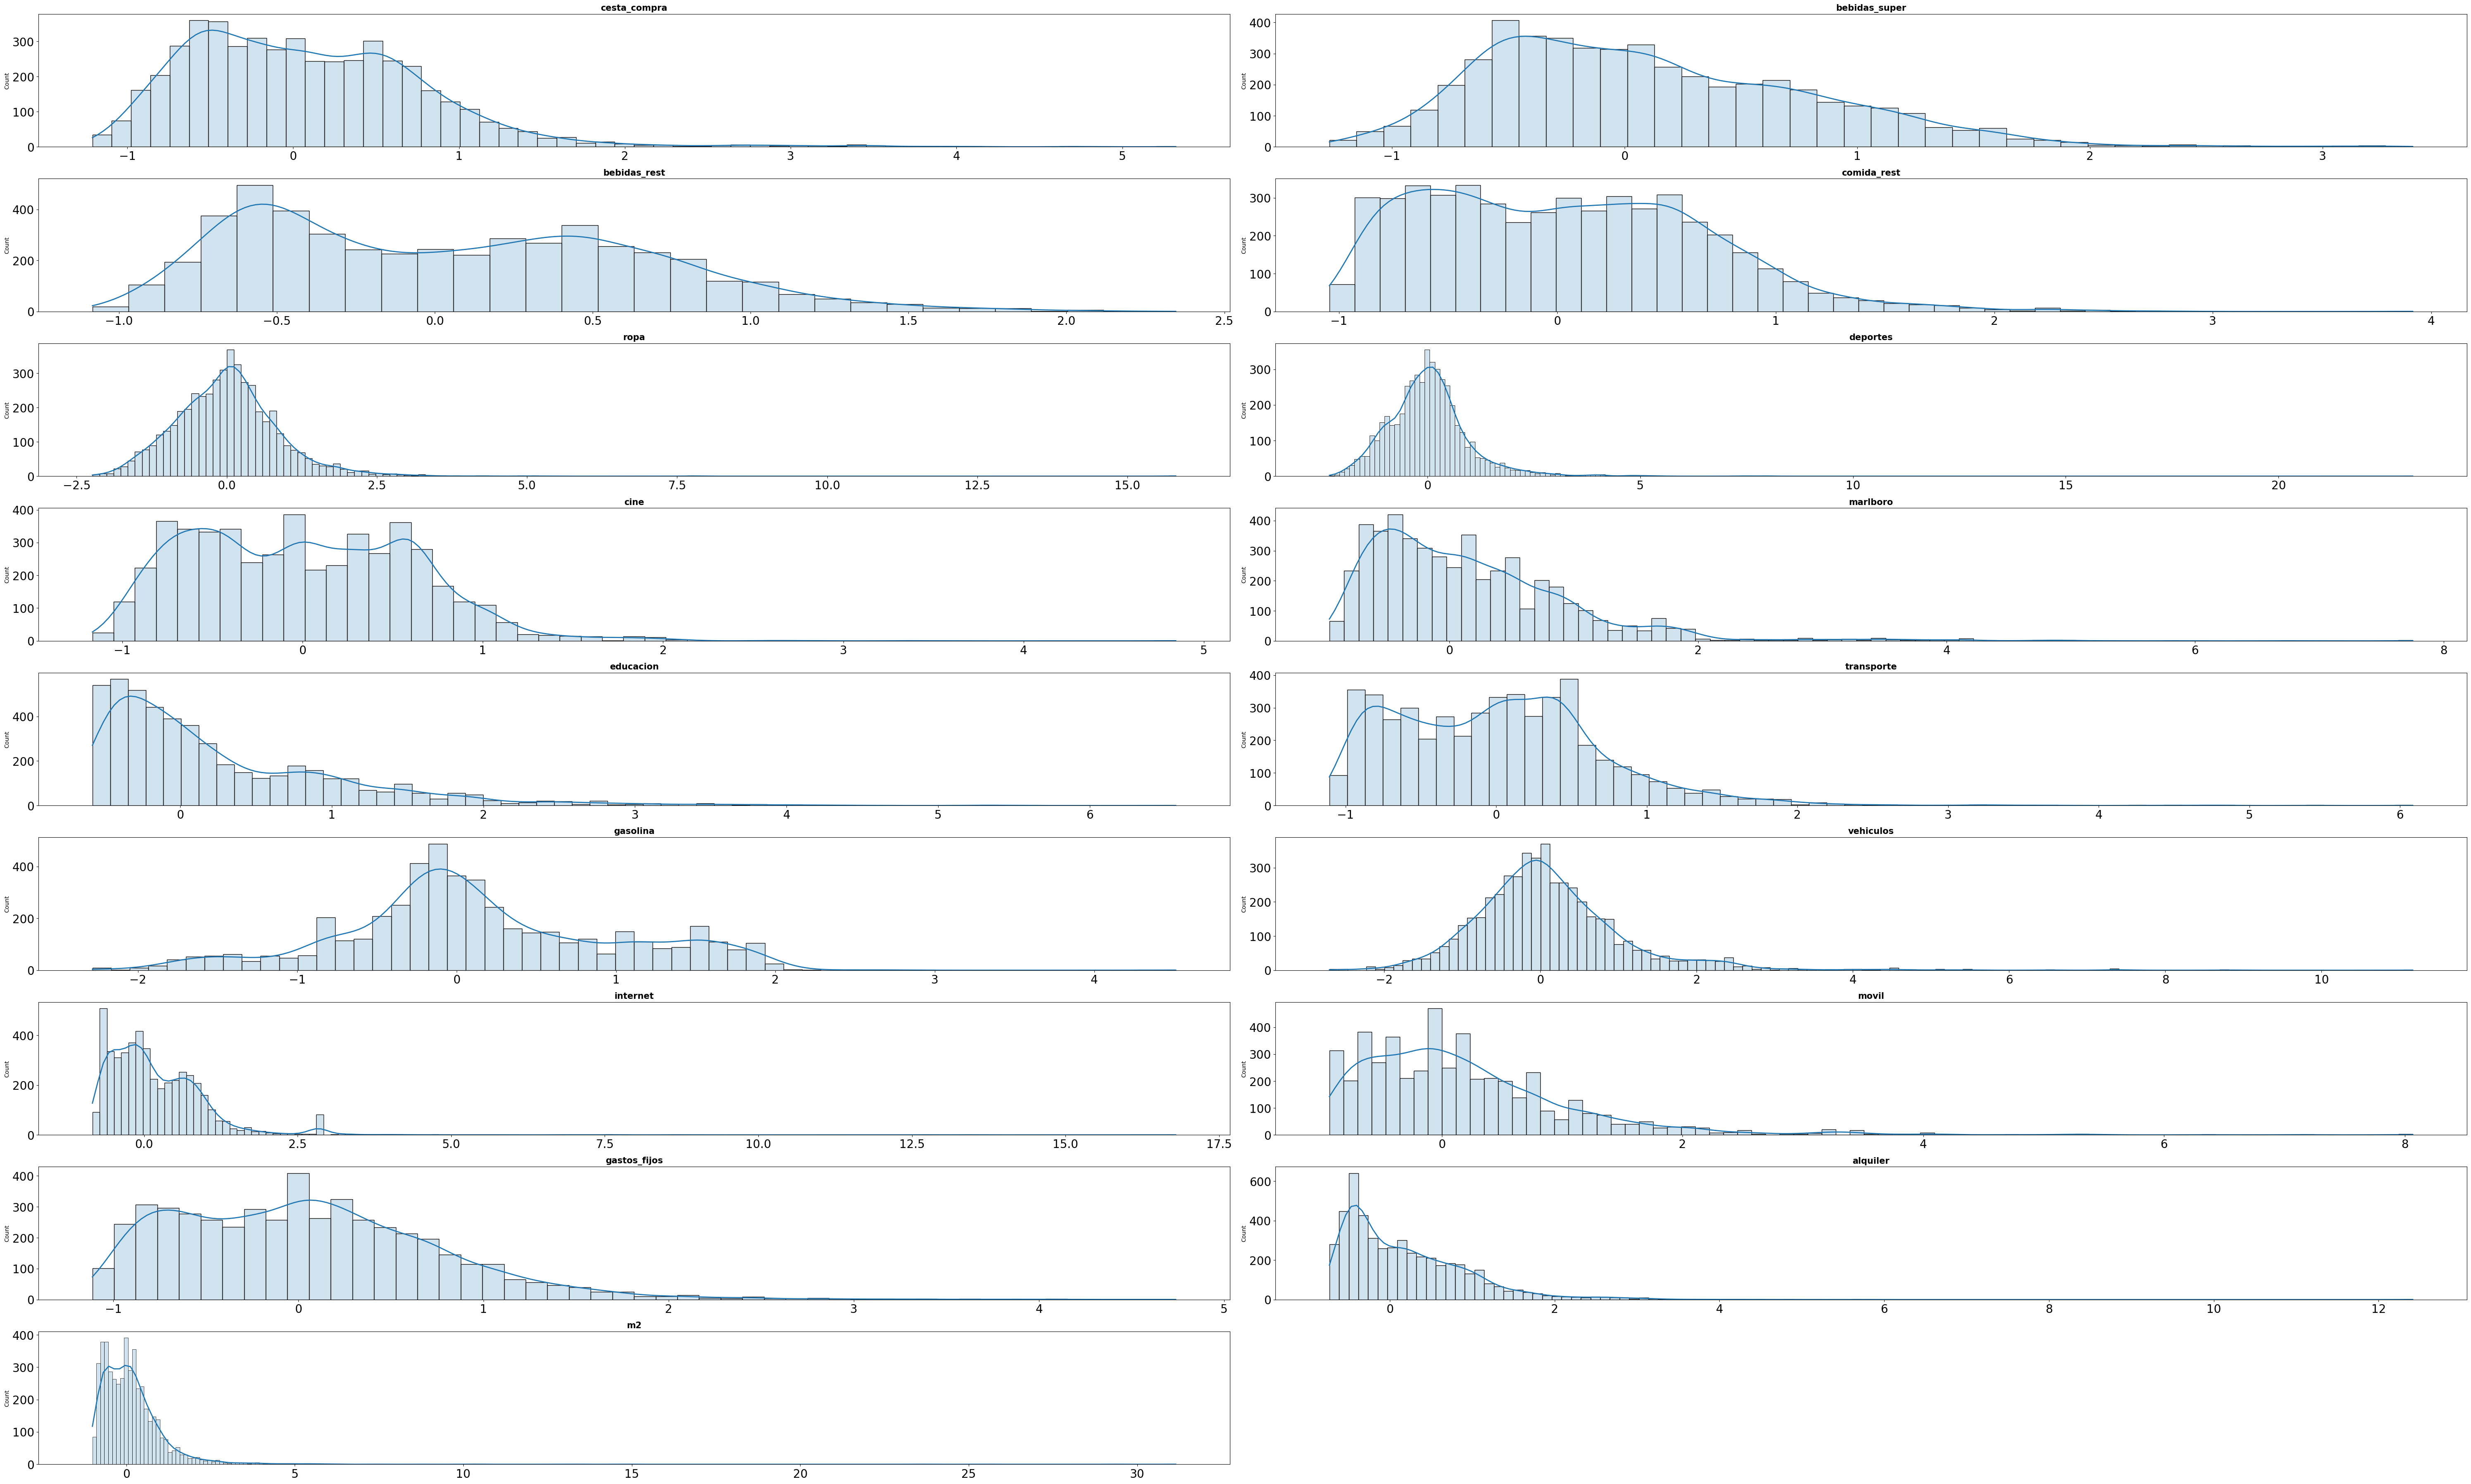

In [14]:
fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize = (60, 40))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i],
        palette = qualitative_colors[5])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])

In [15]:
numericas_robust.duplicated().sum()

92

In [16]:
numericas_robust.to_pickle("../data/6_estandarizacion.pkl")